## CO2 Emissions Data

<h3>Table of Contents</h3>

* [1. Introduction](#1.-Introduction)
    * [1.1 Business Problem](#1.1-Business-Problem)
    * [1.2 Objective](#1.2-Objective)
* [2. Importing Tools](#2.-Dataset)
* [3. About the Dataset](#3.-Dataset)
* [4. Data Cleaning & Preparation](#4.-Data-Cleaning-&-Preparation)
    * [4.1 Global CO2 emission Data](#4.1-Global-CO2-emission-Data)
         * [4.1.1 Variable Overview](#4.1.1-Variable-Overview)
    * [4.2 UK CO2 emission Data](#4.2-UK-CO2-emission-Data)
        * [4.2.1 Variable Overview](#4.2.1-Variable-Overview)
    * [4.3 Mobility Data](#4.3-Mobility-Data)
        * [4.3.1 Variable Overview](#4.3.1-Variable-Overview)
    * [4.4 Confinement Data](#4.4-Confinement-Data)
        * [4.4.1 Variable Overview](#4.4.1-Variable-Overview)
    * [4.5 VAT Data](#4.5-VAT-Data)
        * [4.5.1 Variable Overview](#4.5.1-Variable-Overview)
    * [4.6 Transportation Data](#4.6-Transportation-Data)
        * [4.6.1 Variable Overview](#4.6.1-Variable-Overview)
* [5. Exploring the Data](#5.-Exploring-the-Data)
    * [5.1 Data Visualisation](#5.2-Data-Visualisation)
    * [5.2 Data Visualisation for Merged Dataset](#5.2-Data-Visualisation)
* [6. Regressions using Time Data Series](#7.-Linear-Regression-Model)
    * [6.1 co2_apple_confinement Regressions](#6.1-co2_apple_confinement-Regressions)
    * [6.2 UK Motor Data Regression](#6.2-UK-Motor-Data-Regression)
* [7. Summary and Limitations](#7.-Summary-and-Limitations)
* [References](#References)
* [Appendix 1](#Appendix1)

## 1. Introduction

### 1.1 Background

The COVID-19 pandemic induced a wave of economic and social disruption. Responsive restrictions implemented across the globe forced people out of work places into their homes. This report aims to outline the immediate aftermath of lockdown restrictions within the UK in relation to CO2 emissions and its associated socioeconomic variables. 

### 1.2 Objective
Our focus is to contextualise the impact of the COVID-19 restrictions by analysing year over year changes in the following variables:
- CO2 emissions
- Confinement 
- Mobility 
    - Apple 
    - Google 
- UK VAT reporting 
- Heavy industry reporting

Our analysis can be reported to the Department for Environment, Food and Rural Affairs, outlining the extent to which COVID restrictions have induced a reduction in the environment exhaust of the UK and confirm exactly the reasons for the temporary demise of emissions.

We hope to make precise recommendations about the different aspects of COVID restrictions that have been most effective in reducing CO2 emissions to assist UK public policy making.

## 2. Import Tools

In [103]:
# ADDITION
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [104]:
#worcount
import io
from nbformat import current
def nb_word_count(nb_path):
    with io.open(nb_path, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')
        word_count = 0
        for cell in nb.worksheets[0].cells:
            if cell.cell_type == "markdown":
                word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    return word_count
nb_word_count("MSIN00143_2020_GROUP_L2.ipynb")

# Other words in the markdown include table of contents, references, appendix

2190

In [105]:
#!pip install missingno

In [106]:
# Adding package to load data
# Loading key libraries

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from pandas import DataFrame
import missingno as msno
from pandas import DataFrame
from pylab import *
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
vcvtype = 'nonrobust'

## 3. About the Dataset

Our report utilises 5 data sets (see references section for more details):

#### Global CO2 emission Data
The dataset we used for CO2 emission is Global Carbon Project CO2 emissions data. 

#### UK CO2 emission Data 
The UK CO2 emission data is extracted from Global CO2 emission data. 

#### Mobility Data
   (i) Apple: 
This dataset was made publicly available by apple during the pandemic. It offers a global index for movement, measuring changes in Driving, Walking and Transit. 

   (ii) Google: 
   This data involves Community Mobility Reports from Google Maps outlining the change that took place during COVID-19. 

#### Confinement Data

This data represents the Confinement Index (CI) level assigned following the methodologogy of Le Quere et al. (2020). 

#### UK VAT Data (index)

Value Added Tax(VAT) data has been sourced from the Office for National Statistics and measures turnover for 630,000 businesses in the UK. 


#### Transportation Data

The transportation dataset represents the changes is traffic levels before and after the implementation of a UK lockdown. 

## 4. Data Cleaning & Preparation

### 4.1 Global CO2 emission Data

In [107]:
# load the data
# read 70 sheets into one dictionary
co2_raw_data = pd.read_excel(open("CO2_country.xlsx","rb"),
                         sheet_name = None,
                         skiprows = 0)
# extract region names
regions = []
for i in co2_raw_data.keys():
    regions.append(i)
    
# extract each dataframe    
all_df_list = []
for i in range(0,len(regions)):
    all_df_list.append(co2_raw_data[regions[i]])

# merge all dataframes
appended_df = pd.concat(all_df_list) 
appended_df = appended_df.drop(['REGION_ID','TIME_POINT','REGION_CODE'],axis = 1)

# tidy the dataset
tidy_df = appended_df.melt(
    id_vars = ['REGION_NAME','DATE'],
    value_name = 'CO2_MED',
    var_name = 'SECTOR')

# save the tidy data as
co2_data = tidy_df
co2_data

# info and describe
co2_data.info()
co2_data.describe()

,REGION_NAME,DATE,SECTOR,CO2_MED
0,United Arab Emirates,2020-01-01,TOTAL_CO2_MED,0.000000
1,United Arab Emirates,2020-01-02,TOTAL_CO2_MED,0.000000
2,United Arab Emirates,2020-01-03,TOTAL_CO2_MED,0.000000
3,United Arab Emirates,2020-01-04,TOTAL_CO2_MED,0.000000
4,United Arab Emirates,2020-01-05,TOTAL_CO2_MED,0.000000
...,...,...,...,...
79865,Global,2020-06-07,AVI_CO2_MED,-0.777257
79866,Global,2020-06-08,AVI_CO2_MED,-0.759206
79867,Global,2020-06-09,AVI_CO2_MED,-0.721528
79868,Global,2020-06-10,AVI_CO2_MED,-0.683840


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79870 entries, 0 to 79869
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   REGION_NAME  79870 non-null  object        
 1   DATE         79870 non-null  datetime64[ns]
 2   SECTOR       79870 non-null  object        
 3   CO2_MED      79870 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.4+ MB


,CO2_MED
count,79870.000000
mean,-0.074268
std,0.552145
min,-17.298141
25%,-0.017356
50%,-0.000597
75%,0.000000
max,0.153140


#### 4.1.1 Variable Overview </br> 

<li>"REGION_NAME": region name including 70 regions</li>
<li>"DATE": date</li>
<li>"SECTOR": sectors including Total, Power as PWR, industry as IND, surface transport as TRS, public sectors as PUB, residential as RES, aviation as AVI</li>
<li>"CO2_MED": median value of CO2 emission change compared to last year</li>

### 4.2 UK CO2 emission Data

In [108]:
# UK data: extract UK data from Global data & only Total CO2
uk_co2_data = co2_data.loc[(co2_data['REGION_NAME'] == 'United Kingdom') & (co2_data['SECTOR'] == 'TOTAL_CO2_MED')]
len(uk_co2_data)

# renaming columns
uk_co2_data = uk_co2_data.rename(columns={"DATE":"Date", "CO2_MED":"CO2"})

uk_co2_data.dtypes
# change column 

uk_co2_data = uk_co2_data.drop(columns = ["SECTOR", "REGION_NAME"])
uk_co2_data.head()
uk_co2_data.info()
uk_co2_data.describe()

163

REGION_NAME            object
Date           datetime64[ns]
SECTOR                 object
CO2                   float64
dtype: object

,Date,CO2
3749,2020-01-01,0.0
3750,2020-01-02,0.0
3751,2020-01-03,0.0
3752,2020-01-04,0.0
3753,2020-01-05,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 3749 to 3911
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    163 non-null    datetime64[ns]
 1   CO2     163 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


,CO2
count,163.000000
mean,-0.187654
std,0.145988
min,-0.355976
25%,-0.355976
50%,-0.268018
75%,-0.047832
max,0.000000


#### 4.2.1 Variable Overview
<li>"DATE" - date</li>
<li>"CO2" - UK CO2 emission change in total sectors, comparing to last year</li>

### 4.3 Mobility Data
(i) Cleaning of Apple Mobility Data

In [109]:
# load the data
apple_file = "applemobilitytrends-2020-11-10.csv"
apple = pd.read_csv(apple_file)
apple = DataFrame(apple)
apple.head()

# initial clean
apple = apple.loc[apple["region"] == "United Kingdom"]
apple = apple.T
apple = apple.drop(["sub-region", "country", "alternative_name", "geo_type", "region"])
apple = apple[1:]
apple = apple.reset_index().rename(columns={"index":"Date"})
apple = apple.rename(columns={143:"DRIVING", 144: "TRANSIT", 145: "WALKING"})
apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,139.16,121.37,111.55,110.75,105.40,117.91,133.42,139.40,110.57,101.74
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,148.23,179.53,156.20,159.62,146.06,150.58,150.06,136.80,139.79,146.44
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,52.17,58.80,63.00,64.60,68.67,85.29,92.14,54.30,59.58,64.49
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,39.24,50.75,55.79,56.40,58.83,69.68,68.72,39.29,51.28,55.82
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,93.36,89.07,94.60,94.26,103.66,102.73,84.84,93.04,95.93,98.73


,Date,DRIVING,TRANSIT,WALKING
0,2020-01-13,100,100,100
1,2020-01-14,104.86,104.2,106.14
2,2020-01-15,106.4,105.37,114.37
3,2020-01-16,104.28,103.89,112.59
4,2020-01-17,109.27,109.38,128.99


On Apples website, it states that "data for 11-12 May is not available and will appear as blank columns in the data set."

The solution is provided below:

303

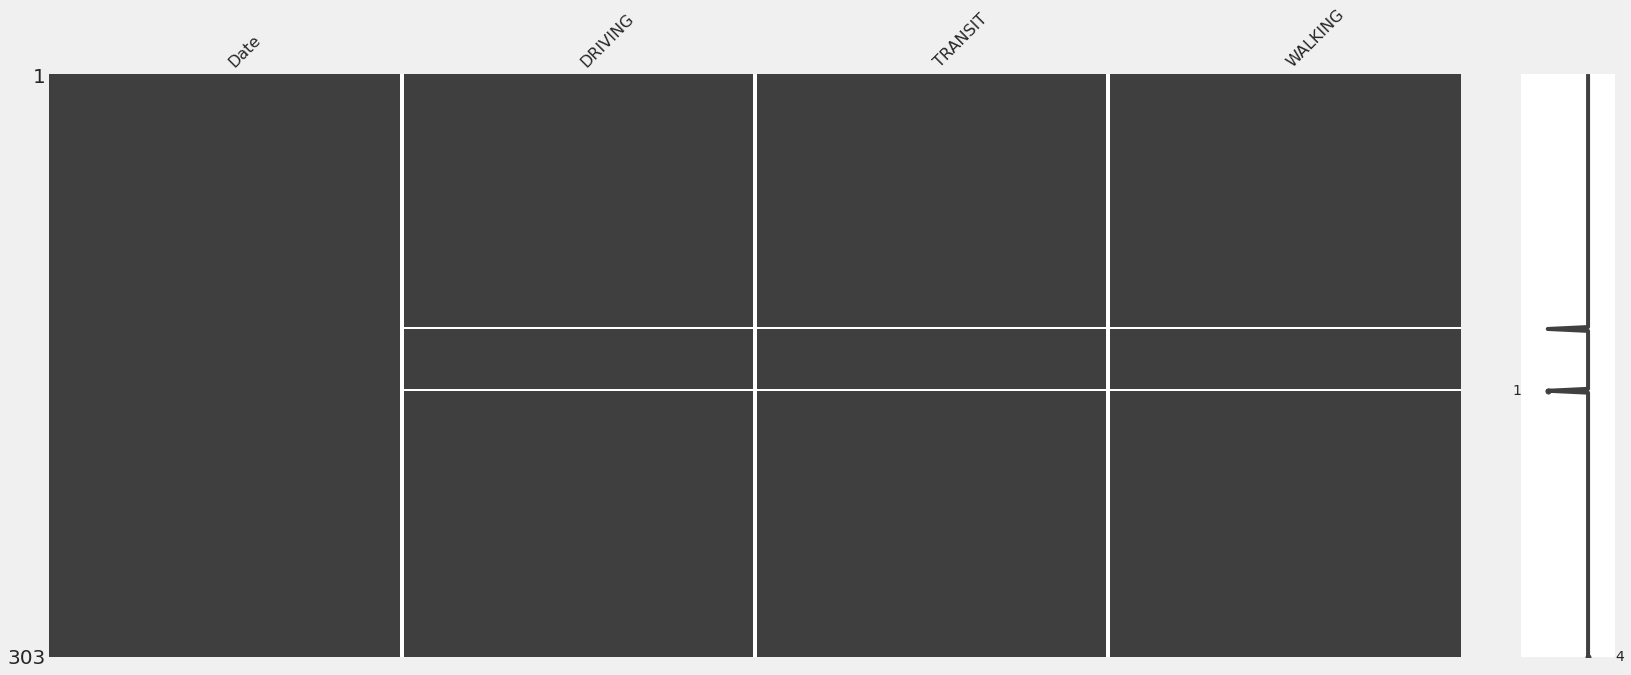

In [110]:
# visualising missing values
len(apple.DRIVING)
msno.matrix(apple.sample(303))
apple = apple.ffill()

In [111]:
# converting date to datetime and other columns from object to numeric.
apple.head()
apple['Date'] = pd.to_datetime(apple['Date'])

apple['DRIVING'] = pd.to_numeric(apple['DRIVING'])
apple['TRANSIT'] = pd.to_numeric(apple['TRANSIT'])
apple['WALKING'] = pd.to_numeric(apple['WALKING'])

apple.dtypes
apple.info()
apple.describe()

,Date,DRIVING,TRANSIT,WALKING
0,2020-01-13,100.00,100.00,100.00
1,2020-01-14,104.86,104.20,106.14
2,2020-01-15,106.40,105.37,114.37
3,2020-01-16,104.28,103.89,112.59
4,2020-01-17,109.27,109.38,128.99


Date       datetime64[ns]
DRIVING           float64
TRANSIT           float64
WALKING           float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     303 non-null    datetime64[ns]
 1   DRIVING  303 non-null    float64       
 2   TRANSIT  303 non-null    float64       
 3   WALKING  303 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.6 KB


,DRIVING,TRANSIT,WALKING
count,303.000000,303.000000,303.000000
mean,92.594752,62.812475,92.283993
std,30.873707,32.548704,33.625484
min,24.460000,13.500000,29.620000
25%,73.225000,31.450000,62.080000
50%,101.930000,69.710000,100.000000
75%,115.650000,84.645000,116.675000
max,150.880000,126.900000,172.590000


(ii) Cleaning of Google Mobility Data </br>

Data cleaning of the Google mobility involved transforming the categorised variables from columns to rows for the visulisation below. The data includes the information from 3/01/2020 to 06/02/2020.

In [112]:
# Loading data
gb_mob = pd.read_csv(r"2020_GB_mobility-20201127-114630.csv")

# dropping columns 
gb_mob = gb_mob.drop("Unnamed: 9", axis=1)
gb_mob = gb_mob.drop("Unnamed: 10", axis=1)

# convert columns to rows
writer = list()
for index, row in gb_mob.iterrows():
    
    for i in gb_mob.columns[3:]:
        temp=[]
        temp.append(row['date'])
        temp.append(i)
        temp.append(row[i])
        writer.append(temp)

# create new .csv with row data
gb_mob_new = pd.DataFrame(writer, columns=['Date', 'Type', 'Value'])
gb_mob_new.to_csv(r'2020_GB_mobility_new.csv', index=False, encoding= 'ISO-8859-1')

#rename columns
gb_mob_new = gb_mob_new.rename(columns={"Date": "date","Type" : "type","Value": "value"})

# Working on date formats
gb_mob_new['date'] = pd.to_datetime(gb_mob_new['date'])
gb_mob_new['months'] = gb_mob_new['date'].dt.month
gb_mob_new['year'] = gb_mob_new['date'].dt.year

gb_mob_new.head()
gb_mob_new.info()
gb_mob_new.describe()

,date,type,value,months,year
0,2020-02-15,retail_and_recreation,-12.0,2,2020
1,2020-02-15,grocery_and_pharmacy,-7.0,2,2020
2,2020-02-15,parks,-35.0,2,2020
3,2020-02-15,transit_stations,-12.0,2,2020
4,2020-02-15,workplaces,-4.0,2,2020


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667326 entries, 0 to 667325
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    667326 non-null  datetime64[ns]
 1   type    667326 non-null  object        
 2   value   605941 non-null  float64       
 3   months  667326 non-null  int64         
 4   year    667326 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 25.5+ MB


,value,months,year
count,605941.000000,667326.000000,667326.0
mean,-15.015201,6.182268,2020.0
std,38.407258,2.924012,0.0
min,-100.000000,1.000000,2020.0
25%,-41.000000,4.000000,2020.0
50%,-15.000000,6.000000,2020.0
75%,5.000000,9.000000,2020.0
max,633.000000,12.000000,2020.0


#### 4.3.1 Variable Overview

(i) Apple Mobility Data: </br>\
Each variable is in index form with a base value of 100. The sample start date 13/01/2020. 
<li>"DRIVING": Change in UK driving levels.</li>
<li>"WALKING": Change in UK walking levels.</li>
<li>"TRANSIT": Change in UK public transport usage.</li>

(ii) Google Mobility Data </br>
<li>"date": format dd.mm.yyyy</li>
<li>"type": type of mobility</li>
<li>"value": changes in median value over each 5wk- period compared to the time spend by people in various categorised places. </li>

### 4.4 Confinement Data

In [113]:
## Confinement index
# Loading data
Confinement_index_11June2020 = "Confinement_index_11June2020-20201125-103035.csv"
Confinement_index = pd.read_csv(Confinement_index_11June2020)
Confinement_index = DataFrame(Confinement_index)
Confinement_index.head()

# Cleaning
Confinement_index = Confinement_index.drop([0])
Confinement_index.columns = Confinement_index.iloc[0]
Confinement_index = Confinement_index.drop([1])
Confinement_index = Confinement_index[["Date", "United Kingdom"]]

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,Region,Global,Global,Global,Global,Global,Global,Global,Global,Global,...,Global,Global,Global,Global,Global,Global,Global,Global,Global,Global
1,Date,Algeria,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Canada,...,Thailand,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,USA,Uzbekistan,Venezuela,Vietnam
2,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,0,0,0
3,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-03,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [114]:
# converting columns from objects to datetime or numeric values
Confinement_index['Date'] = pd.to_datetime(Confinement_index['Date'])
Confinement_index['United Kingdom'] = pd.to_numeric(Confinement_index['United Kingdom'])
Confinement_index['United Kingdom'] = Confinement_index['United Kingdom'].astype(float)

# renaming columns
Confinement_index = Confinement_index.rename(columns={"United Kingdom":"Confinement Index"})

Confinement_index.dtypes
Confinement_index.head()

1
Date                 datetime64[ns]
Confinement Index           float64
dtype: object

1,Date,Confinement Index
2,2020-01-01,0.0
3,2020-01-02,0.0
4,2020-01-03,0.0
5,2020-01-04,0.0
6,2020-01-05,0.0


In [115]:
Confinement_index.info()
Confinement_index.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 2 to 164
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               163 non-null    datetime64[ns]
 1   Confinement Index  163 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


1,Confinement Index
count,163.000000
mean,1.601227
std,1.162903
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


#### 4.4.1 Variable Overview

Confinement Index levels:	</br>
<li>    0:	No restrictions	</li>
<li>  1:	Policy design </li>            
<li>  2:	Regional policies </li>
<li>   3:	National policies </li>
(check Appendix 1 for more)

### 4.5 VAT Data

In [116]:
# Loading data from file data base
from csv import reader
# Load a CSV file
def load_csv(filename):
    file = open(filename, "r")
    lines = reader(file)
    dataset = list(lines)
    return dataset

filename = './Programming/VATindexTurnoverYoY.csv'
dataset = load_csv('./VATindexTurnoverYoY.csv')

VAT_data = pd.read_csv('VATindexTurnoverYoY.csv', header=0)
VAT_data= VAT_data.dropna()
print("Loaded data file {0} with {1} rows and {2} columns".format(filename, len(dataset), len(dataset[0])))

# Confirming format of VAT data
VAT_data.head()

Loaded data file ./Programming/VATindexTurnoverYoY.csv with 32 rows and 24 columns


,Date,Total_YoY,Agriculture_YoY,Production_YoY,Construction_YoY,Agriculture_YoY(1),Services__YoY,Mining_YoY,Manufacturing_YoY,Electricity_gas_steam_air_YoY,...,Accommodation_food_YoY,Information_comms_YoY,Real_estate_YoY,Professional_scientific_YoY,Admin_YoY,Public_defence_YoY,Education_YoY,health_social_work_YoY,Arts_YoY,Other_YoY
0,2018-03-01,0.01,0.01,-0.01,-0.04,0.01,0.00,-0.08,-0.03,0.19,...,-0.25,-0.11,0.03,-0.07,-0.05,0.01,-0.08,0.18,0.14,-0.13
1,2018-04-01,0.09,0.11,0.18,0.06,0.11,0.06,0.09,0.17,0.37,...,-0.06,0.12,0.08,0.08,0.13,0.18,0.09,0.02,0.09,0.06
2,2018-05-01,0.07,0.05,0.15,0.02,0.05,0.08,0.08,0.14,0.35,...,0.03,0.06,0.08,-0.01,0.05,0.06,-0.03,-0.10,0.10,0.18
3,2018-06-01,0.02,0.00,0.05,0.03,0.00,0.03,-0.02,0.04,0.14,...,0.09,-0.02,0.05,0.00,0.04,0.15,-0.02,-0.03,0.18,0.02
4,2018-07-01,0.09,0.10,0.12,0.06,0.10,0.07,0.19,0.11,0.16,...,-0.07,0.02,0.12,0.06,0.17,0.16,0.12,0.15,0.04,0.08


Once VAT data is loaded, missing values and duplicates were checked. 
No null values were returned, duplicated sector columns were removed and renamed. 
Thus, our VAT data can be visualised.

In [117]:
# check for missing data and null values in file
VAT_data.info()
# With 31 non-null values for all variables we can say we dont have any missing values and cleaning for VAT data is not required

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           31 non-null     object 
 1   Total_YoY                      31 non-null     float64
 2   Agriculture_YoY                31 non-null     float64
 3   Production_YoY                 31 non-null     float64
 4   Construction_YoY               31 non-null     float64
 5   Agriculture_YoY(1)             31 non-null     float64
 6   Services__YoY                  31 non-null     float64
 7   Mining_YoY                     31 non-null     float64
 8   Manufacturing_YoY              31 non-null     float64
 9   Electricity_gas_steam_air_YoY  31 non-null     float64
 10  Construction_YoY(1)            31 non-null     float64
 11  Water supply_sewerage_YoY      31 non-null     float64
 12  Wholesale_retail_YoY           31 non-null     float

In [118]:
# Delete duplicated columns from data set 
del VAT_data['Agriculture_YoY(1)']
del VAT_data['Construction_YoY(1)']

In [119]:
# renaming variables
VAT_1 = VAT_data.rename(columns={ "Total_YoY":"Total","Agriculture_YoY":"Agriculture","Production_YoY":"Production","Construction_YoY":"Construction", "Services__YoY":"Services", "Mining_YoY":"Mining", "Manufacturing_YoY": "Manufacturing", "Electricity_gas_steam_air_YoY": "Electricity_gas_steam_air", "Water supply_sewerage_YoY":"Water supply_sewerage","Accommodation_food_YoY": "Accommodation_food", "Information_comms_YoY":"Information_comms", "Real_estate_YoY":"Real_estate", "Professional_scientific_YoY":"Professional_scientific", "Admin_YoY":"Admin", "Public_defence_YoY":"Public_defence","Education_YoY":"Education", "health_social_work_YoY":"health_social_work","Arts_YoY":"Arts", "Other_YoY" : "Other"})
VAT_1.head()

,Date,Total,Agriculture,Production,Construction,Services,Mining,Manufacturing,Electricity_gas_steam_air,Water supply_sewerage,...,Accommodation_food,Information_comms,Real_estate,Professional_scientific,Admin,Public_defence,Education,health_social_work,Arts,Other
0,2018-03-01,0.01,0.01,-0.01,-0.04,0.00,-0.08,-0.03,0.19,0.07,...,-0.25,-0.11,0.03,-0.07,-0.05,0.01,-0.08,0.18,0.14,-0.13
1,2018-04-01,0.09,0.11,0.18,0.06,0.06,0.09,0.17,0.37,0.10,...,-0.06,0.12,0.08,0.08,0.13,0.18,0.09,0.02,0.09,0.06
2,2018-05-01,0.07,0.05,0.15,0.02,0.08,0.08,0.14,0.35,0.06,...,0.03,0.06,0.08,-0.01,0.05,0.06,-0.03,-0.10,0.10,0.18
3,2018-06-01,0.02,0.00,0.05,0.03,0.03,-0.02,0.04,0.14,0.12,...,0.09,-0.02,0.05,0.00,0.04,0.15,-0.02,-0.03,0.18,0.02
4,2018-07-01,0.09,0.10,0.12,0.06,0.07,0.19,0.11,0.16,0.18,...,-0.07,0.02,0.12,0.06,0.17,0.16,0.12,0.15,0.04,0.08


This data can be used to identify the UK economic sectors most affected by COVID-19 restrictions, defining which contribute most to C02 emissions reductions.

The data comprises VAT data from 03/2018 - 09/2020, across 22 UK sectors. Each month shows the VAT turnover diffusion index:a measure of UK VAT turnover for businesses in each sector on YoY basis. 

#### 4.5.1 Variable Overview: </br>

<li>"Date": format dd.mm.yyyy
<li>"Total": VAT Diffusion index across all UK economic sectors .</li>
<li>"VAT Diffusion Index: Index that measures the year-over-year turnover of businesses within a particular sector of the UK economy. </li>

### 4.6 Transportation Data (Motor Data)

In [120]:
# Loading data from file data base
from csv import reader
# Load a CSV file
def load_csv(filename):
    file = open(filename, "r")
    lines = reader(file)
    dataset = list(lines)
    return dataset

filename = './Programming/motor_data_uk.csv'
dataset = load_csv('./motor_data_uk.csv')

motor_data = pd.read_csv('motor_data_uk.csv')

# creating a DataFrame from motor_movement
motor_movement = DataFrame(motor_data)

# showing first 5 rows of motor_movement
motor_movement.head()

,Date,AllMotor,Cars,LightCommercial,HeavyCommercial,HeavyCommercial.1
0,01/03/2020,104,111,103,108,108
1,02/03/2020,103,106,102,103,103
2,03/03/2020,102,105,101,102,102
3,04/03/2020,101,104,101,103,103
4,05/03/2020,100,103,100,102,102


In [121]:
# dropping duplicated column 'HeavyCommercial.1'
motor_movement = motor_movement.drop(['HeavyCommercial.1'], axis=1)

# renaming variables 
motor_movement = motor_movement.rename(columns={"Date": "date", "AllMotor": "all_motor", "Cars": "cars", "LightCommercial": "light_commercial", "HeavyCommercial": "heavy_commercial"})
motor_movement.head(5)

,date,all_motor,cars,light_commercial,heavy_commercial
0,01/03/2020,104,111,103,108
1,02/03/2020,103,106,102,103
2,03/03/2020,102,105,101,102
3,04/03/2020,101,104,101,103
4,05/03/2020,100,103,100,102


#### 4.6.1 Variable Overview

Data from 01/03/2020 to 09/11/2020 with baseline value 100, comparing traffic levels with the first week of February.
<li>“all_motor”: change in UK traffic levels 
<li>“cars”: change in UK car traffic levels 
<li>“light_commercial”: change in UK light commercial vehicle traffic levels
<li>“heavy_commercial”: change in UK heavy commercial vehicle levels

In [122]:
# show list of variables, number of observations per variable and datatype of each variable 
motor_movement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              254 non-null    object
 1   all_motor         254 non-null    int64 
 2   cars              254 non-null    int64 
 3   light_commercial  254 non-null    int64 
 4   heavy_commercial  254 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.0+ KB


In [123]:
motor_movement.isnull().values.any()

False

In [124]:
# convert date to datetime object for visualisations
motor_movement['date'] = pd.to_datetime(motor_movement['date'], format ='%d/%m/%Y')
motor_movement.head(5)

,date,all_motor,cars,light_commercial,heavy_commercial
0,2020-03-01,104,111,103,108
1,2020-03-02,103,106,102,103
2,2020-03-03,102,105,101,102
3,2020-03-04,101,104,101,103
4,2020-03-05,100,103,100,102


In [125]:
# showing first date 
motor_movement["date"].min()

Timestamp('2020-03-01 00:00:00')

In [126]:
# showing last date
motor_movement["date"].max()

Timestamp('2020-11-09 00:00:00')

In [127]:
# checking for 'date' data type
motor_movement.head()
motor_movement.info()
motor_movement.describe()

,date,all_motor,cars,light_commercial,heavy_commercial
0,2020-03-01,104,111,103,108
1,2020-03-02,103,106,102,103
2,2020-03-03,102,105,101,102
3,2020-03-04,101,104,101,103
4,2020-03-05,100,103,100,102


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              254 non-null    datetime64[ns]
 1   all_motor         254 non-null    int64         
 2   cars              254 non-null    int64         
 3   light_commercial  254 non-null    int64         
 4   heavy_commercial  254 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 10.0 KB


,all_motor,cars,light_commercial,heavy_commercial
count,254.000000,254.000000,254.000000,254.000000
mean,75.885827,83.960630,72.625984,92.885827
std,22.277418,23.855097,22.416068,17.803460
min,23.000000,22.000000,22.000000,25.000000
25%,60.750000,71.250000,57.500000,83.250000
50%,85.000000,93.000000,82.000000,98.000000
75%,92.000000,101.750000,89.000000,104.000000
max,107.000000,121.000000,105.000000,125.000000


## 5. Exploring the Data

### 5.1 Data Visualisation

#### Visualisation for Global CO2 Data

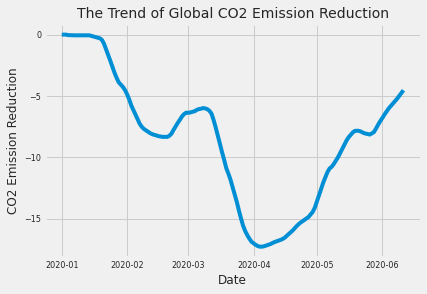

In [179]:
## VISUALISATION 1

# Get the global data
global_co2_data = co2_data.loc[
    (co2_data['REGION_NAME'] == 'Global') & 
    (co2_data['SECTOR'] == 'TOTAL_CO2_MED')] 

# Plot the trend of global co2 emission reduction
plt.plot(global_co2_data['DATE'],global_co2_data['CO2_MED'])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('CO2 Emission Reduction',fontsize = 12)
plt.xlabel('Date',fontsize = 12)
plt.title('The Trend of Global CO2 Emission Reduction',fontsize = 14)

plt.show();

From the plot above, a drop in global CO2 emissions in January is observed following the Chinese COVID-19 outbreak. From March to April, we observed the largest drop due to the stringent lockdown measures implemented in some regions. After April, easing lockdown restrictions caused the global CO2 emission to rise.

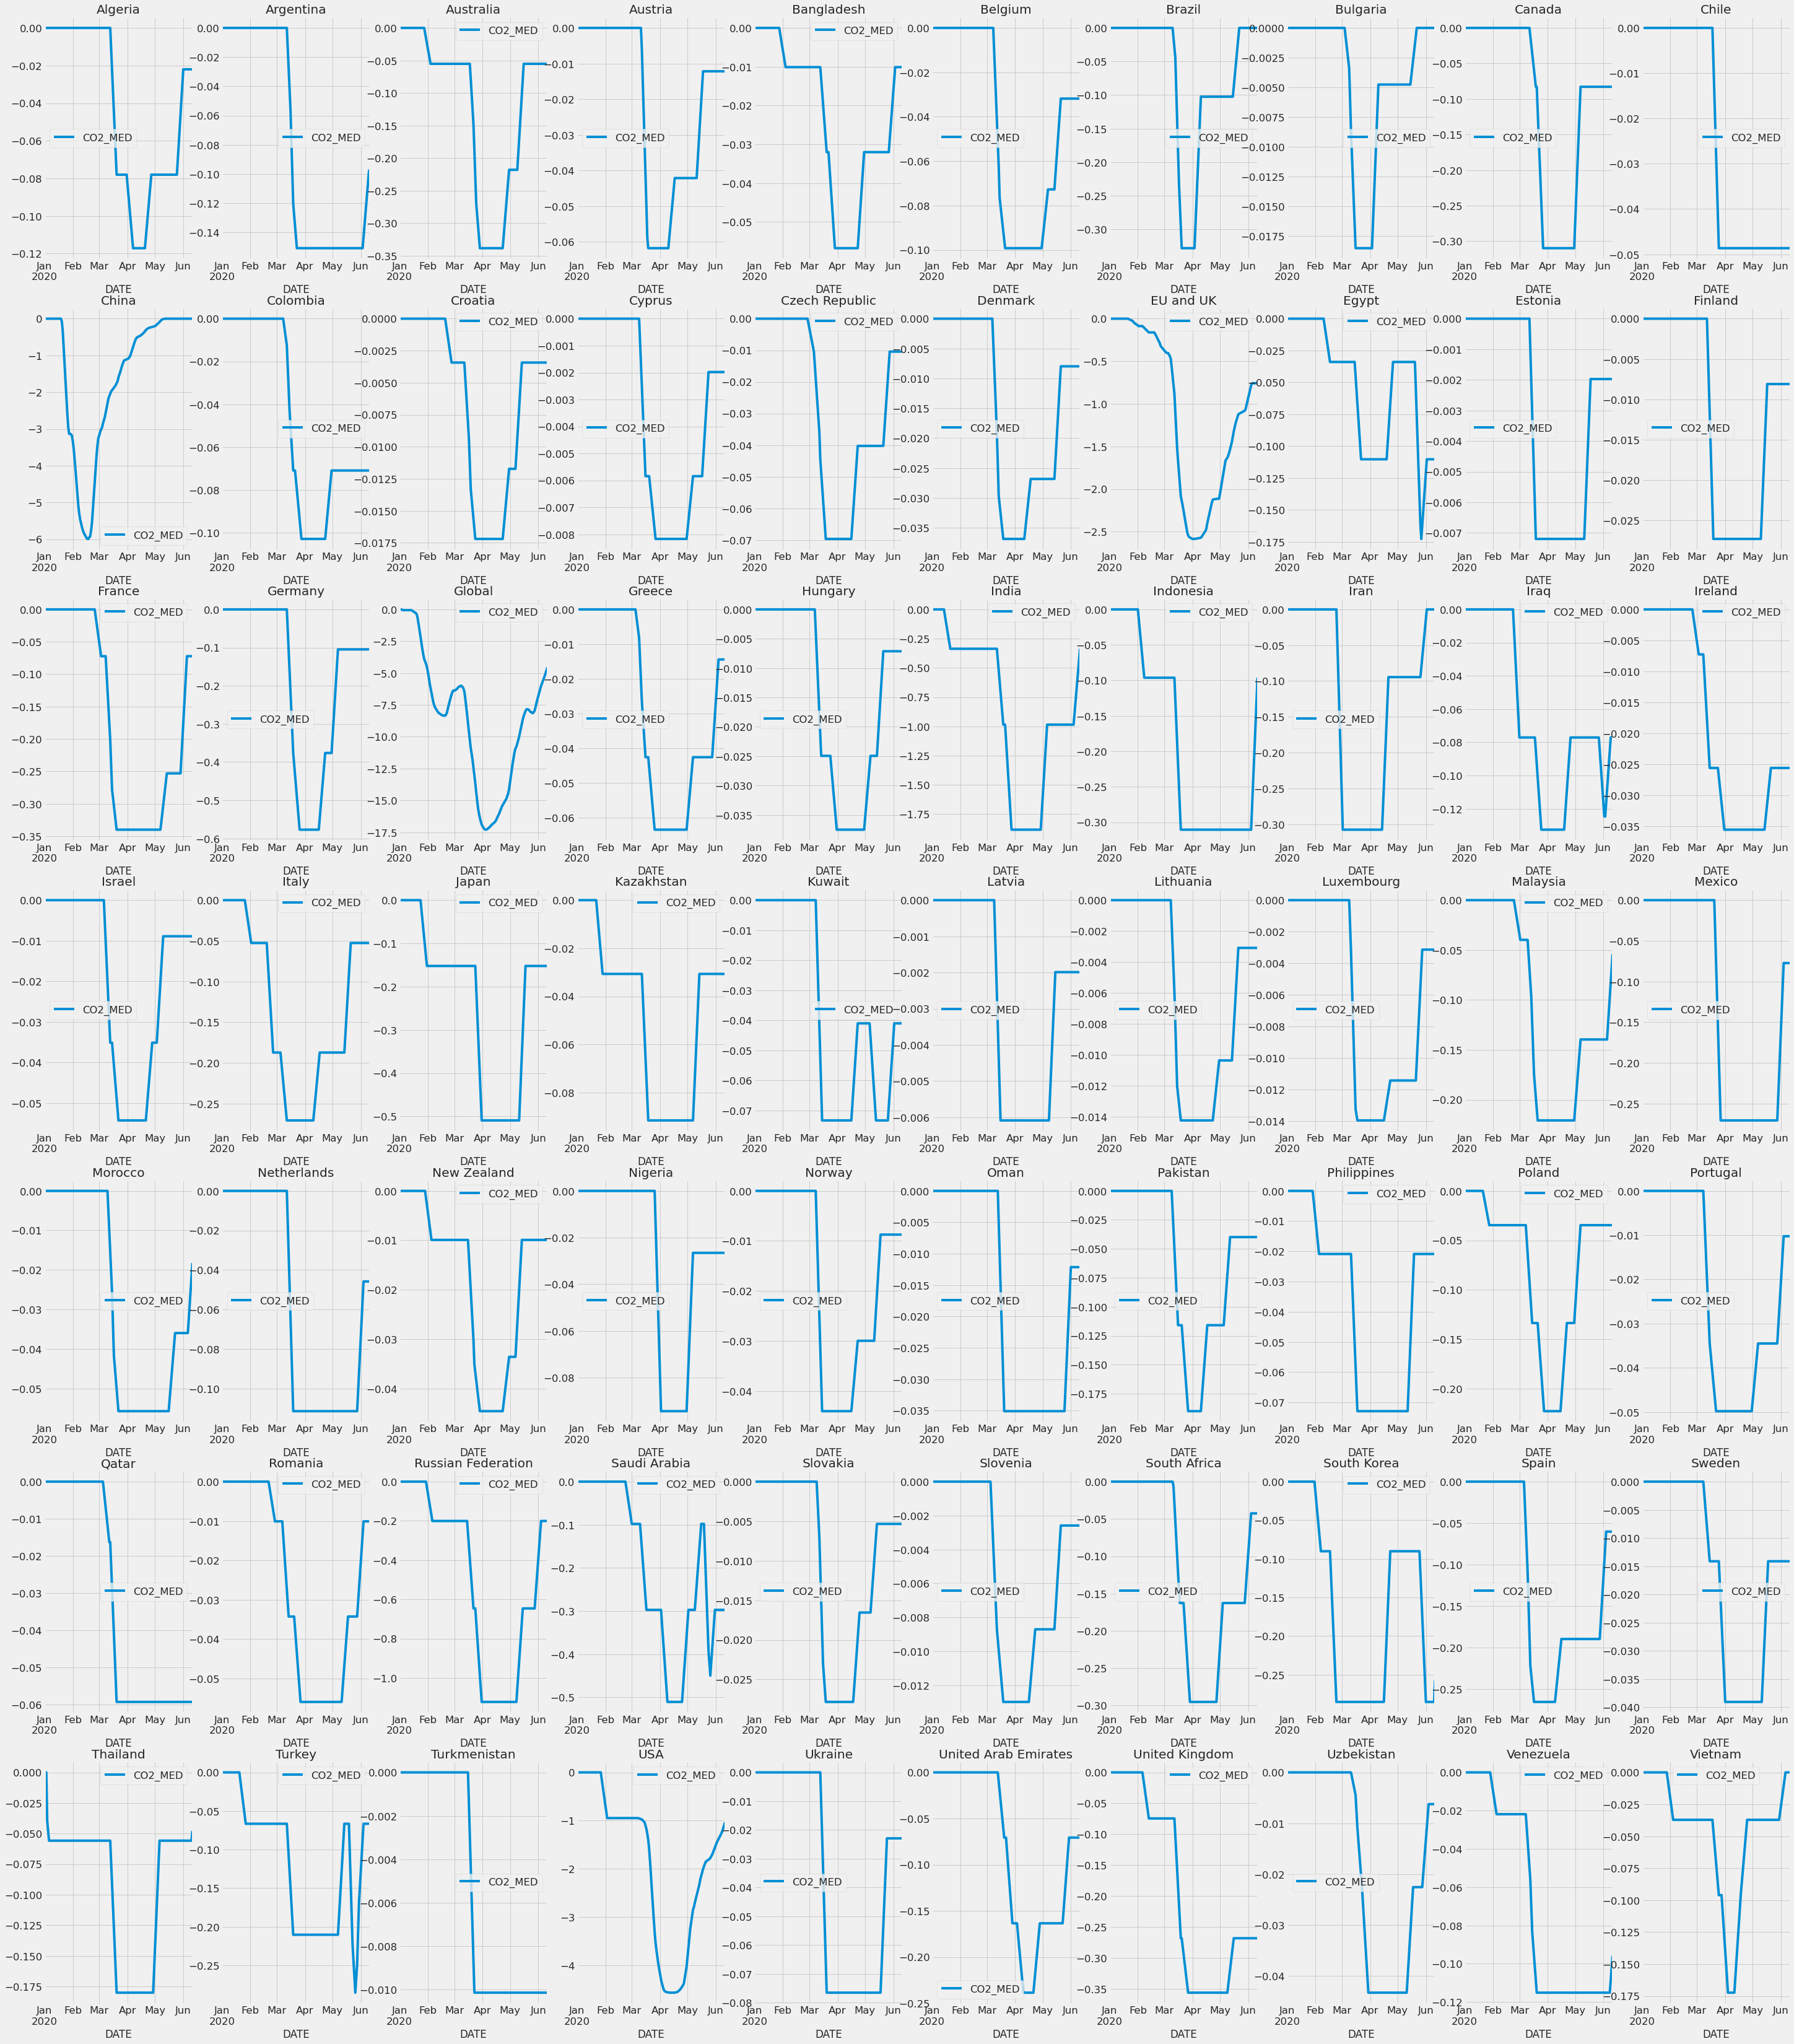

In [170]:
## VISUALISATION 2

# Global Data Visualisation
co2_data_total = co2_data.loc[co2_data['SECTOR'] == 'TOTAL_CO2_MED'] 
fig, axes = plt.subplots(7,10, figsize=(45,55))
for (region_name, group), ax in zip(co2_data_total.groupby(['REGION_NAME']), axes.flatten()):
    group.plot(x='DATE', y='CO2_MED', kind='line', ax=ax, title=region_name)

# plot the co2 emission reduction trend for each region
plt.show();

From the subplots above, the trend across most regions is similar. One exception is China, where the CO2 emissions rose after March, when the pandemic was under control and lockdown lifted. 

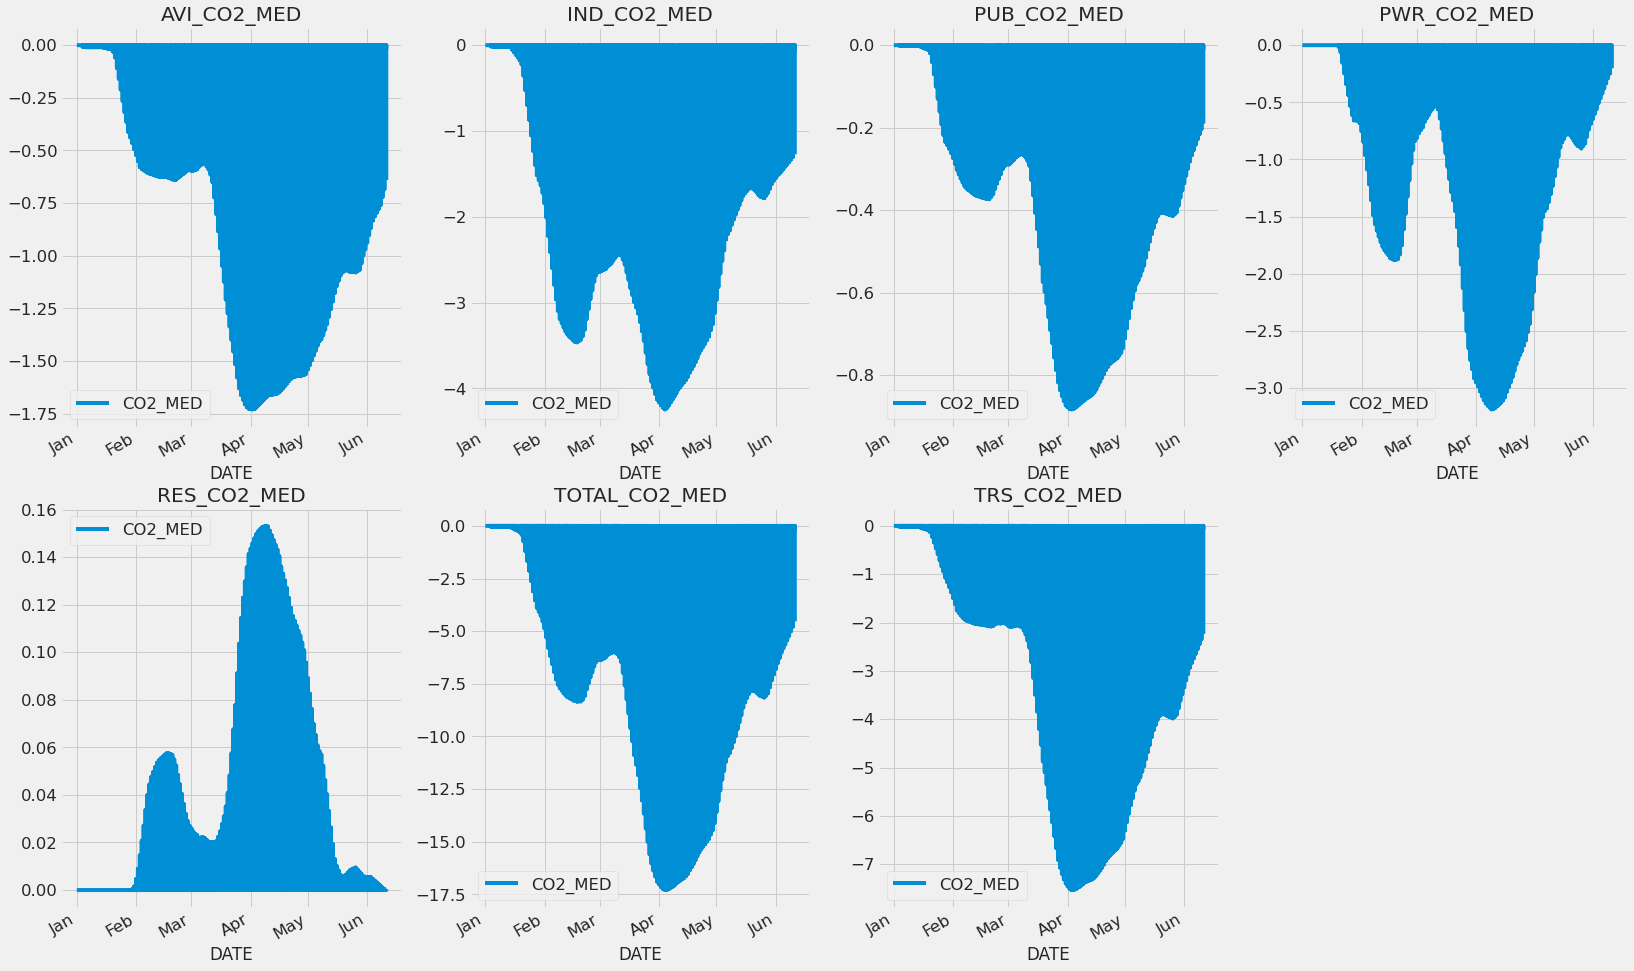

In [168]:
fig, axes = plt.subplots(2,4, figsize=(25,18))
for (sector, group), ax in zip(co2_data.groupby(['SECTOR']), axes.flatten()):
    group.plot(x='DATE', y='CO2_MED', kind='line', ax=ax, title=sector)
    date_form = mdates.DateFormatter("%b")
    ax.xaxis.set_major_formatter(date_form)

# plot the co2 emission reduction trend for each sector
fig.delaxes(axes[1,3])

plt.show();

Most sectors observe a drop in CO2 emissions, mirroring the global trend. However, as individuals are encouraged to stay home, residential CO2 emission levels rise.

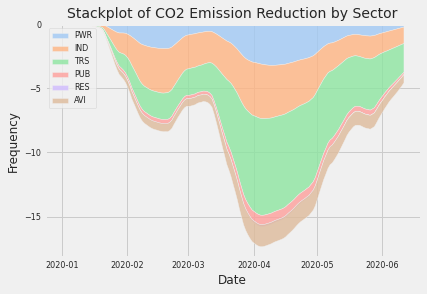

In [161]:
## VISUALISATION 1

# Stackplot
co2_data_sector = appended_df
co2_data_sector = co2_data_sector.rename(columns={'TOTAL_CO2_MED':'TOTAL', 'PWR_CO2_MED':'PWR', 'IND_CO2_MED':'IND', 'TRS_CO2_MED':'TRS',
       'PUB_CO2_MED':'PUB', 'RES_CO2_MED':'RES', 'AVI_CO2_MED':'AVI'})
co2_data_sector = co2_data_sector.set_index(['DATE'])
co2_data_sector = co2_data_sector.loc[co2_data_sector['REGION_NAME'] == 'Global']

x=co2_data_sector.index
y1=co2_data_sector['PWR']
y2=co2_data_sector['IND']
y3=co2_data_sector['TRS']
y4=co2_data_sector['PUB']
y5=co2_data_sector['RES']
y6=co2_data_sector['AVI']
y = [y1, y2, y3, y4, y5,y6]
labels=['PWR','IND','TRS','PUB','RES','AVI']
colors = sns.color_palette("pastel", 6)

# include title and axis labelling
plt.stackplot(x,y,colors = colors,alpha = 0.8)
plt.legend(loc = 'upper left',labels=labels,fontsize = 8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Stackplot of CO2 Emission Reduction by Sector',fontsize = 14)
plt.ylabel('Frequency',fontsize = 12)
plt.xlabel('Date',fontsize = 12)

plt.show();

From the stackplot, it is clear that in surface transportation sector, the drop of CO2 emission accounts for the highest proportion of total drop. This can be explained by the lockdown, which leads to less transportation. 

#### Visualisation for Apple Mobility Data 

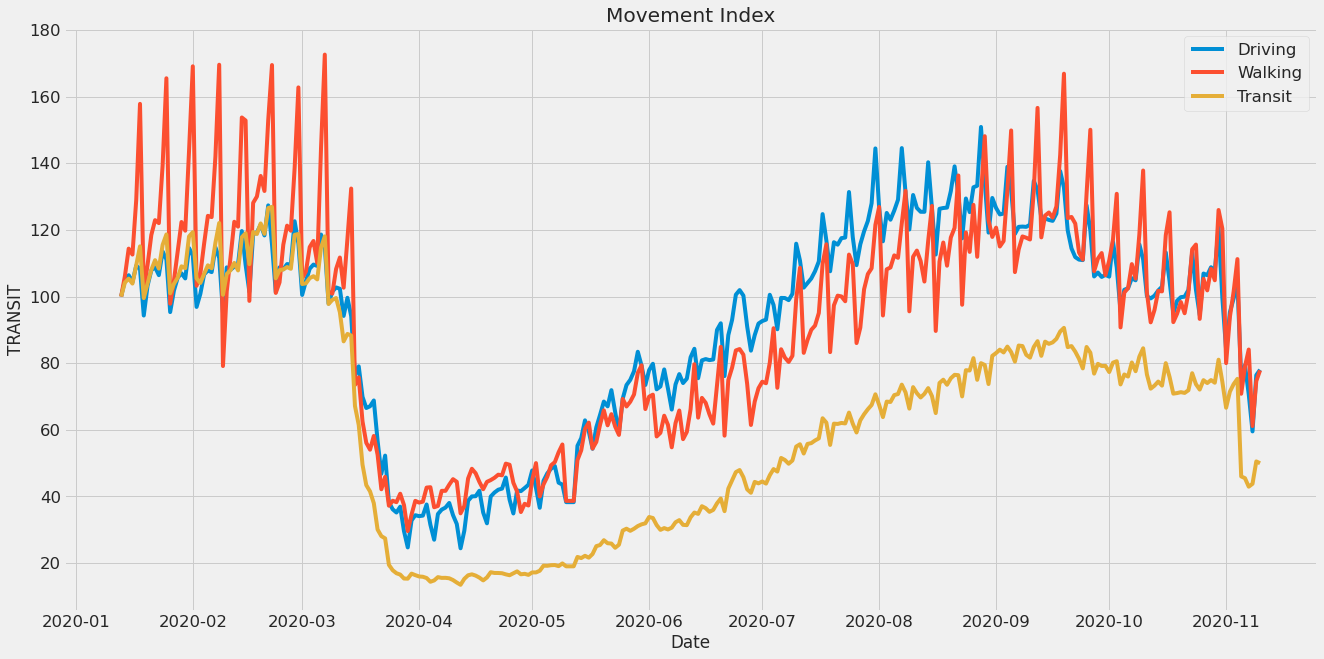

In [174]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Movement")

sns.lineplot(data=apple, x="Date", y="DRIVING", dashes=False, label = "Driving").set_title("Movement Index")
sns.lineplot(x="Date", y="WALKING", data=apple, label = "Walking")
sns.lineplot(x="Date", y="TRANSIT", data=apple, label = "Transit")

plt.show();

The graph above shows a sharp decline in movement during March and April with severe lockdown restrictions. A much smaller decline is registered during the second-wave of restrictions in Novemeber. However, more data is needed. 

#### Visualisation for Google Mobility Data 

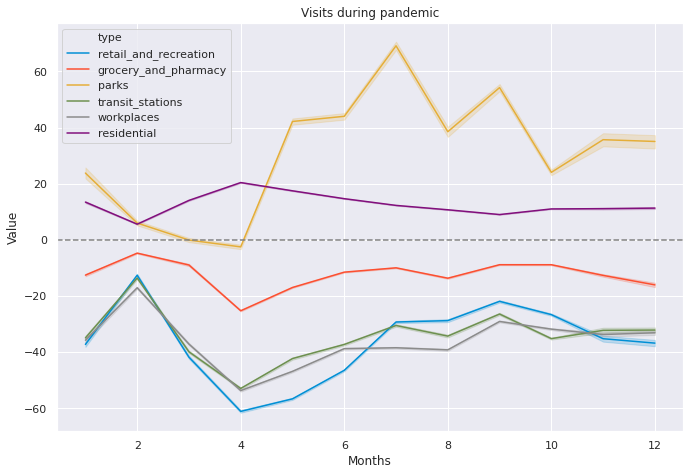

In [176]:
## VISUALISATION 1

import seaborn as sns
plt.figure(figsize=(10,7))

sns.set_style("darkgrid")
sns.set_context("notebook")

sns.lineplot(data=gb_mob_new, x="months", y="value", hue="type")

plt.title("Visits during pandemic")
plt.xlabel("Months")
plt.ylabel("Value")

#add baseline
plt.axhline(0, ls='--', color= 'grey')

plt.show();

The results show an increase in the number of visits to parks in Month 7 (July) and a decrease between months 2 to 4, with the exception of residential visits.

Google Mobility data was not included in our regressions:
the data collected is not on YoY basis.

#### Visualisation for Transportation Data

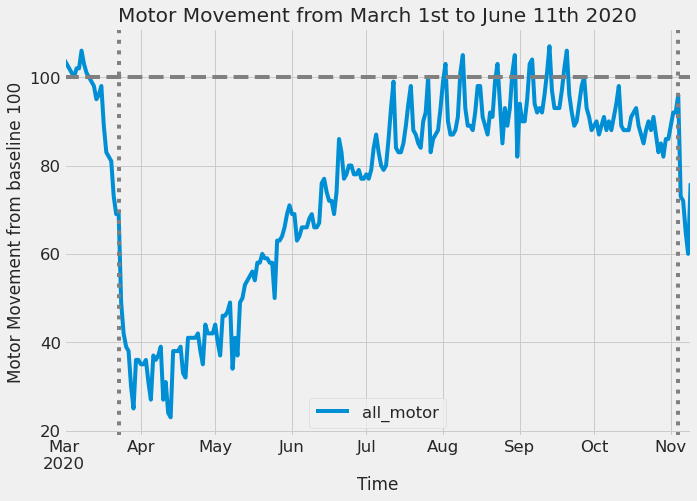

In [159]:
## VISUALISATION 1
#motor_data visualisation one

#create a dataframe with columns 'date', 'light_commercial', heavy_commercial, 'cars'
motor_movement1= pd.DataFrame(motor_movement, columns= ['Date','all_motor'])

motor_movement1.set_index('Date', inplace=True)

fig, ax = plt.subplots(figsize=(10,7))
motor_movement1.plot(ax=ax)

#motor_movement.plot(x = 'Date', y = 'all_motor', figsize=(20,10), label= 'Average Motor Movement')
plt.title('Motor Movement from March 1st to June 11th 2020')
plt.xlabel('Time')
plt.ylabel('Motor Movement from baseline 100')
plt.legend()

#add baseline
plt.axhline(100, ls='--', color= 'grey')

#add start of lockdown
plt.axvline(x = '2020-03-23', ls=':', color= 'grey', label = 'first full lockdown')
plt.axvline(x = '2020-11-04', ls=':', color= 'grey', label = 'first full lockdown')

plt.show();

As expected, this plot shows that traffic levels fell significanly once the lockdown started, and return to pre-lockdown levels with restriction easing in mid-july. Greater resilience in traffic levels can be observed after the implementation of the second lockdown on November 4th. 

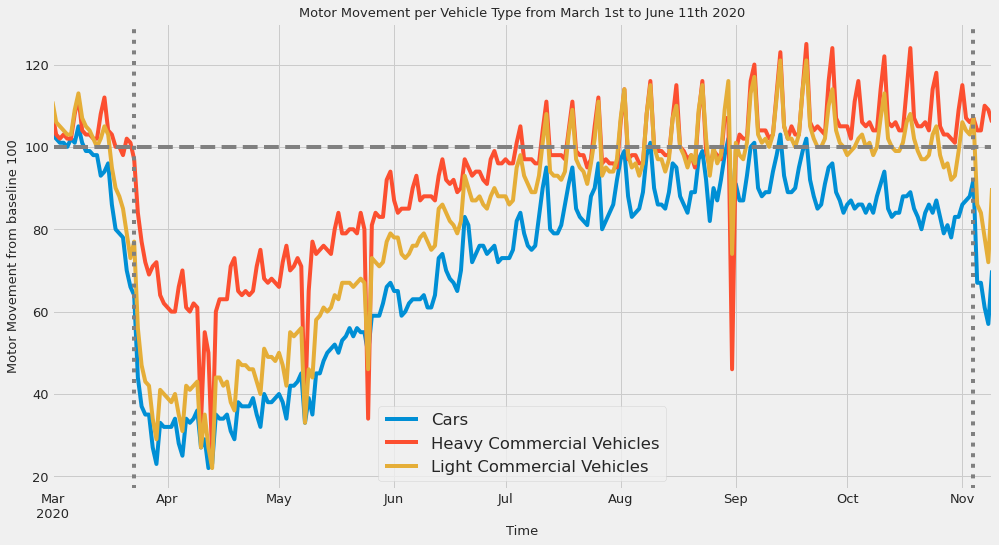

In [160]:
## VISUALISATION 2

#motor_data visualisation 2

#create a dataframe with columns 'date', 'light_commercial', heavy_commercial, 'cars'
motor_movement2= pd.DataFrame(motor_movement, columns= ['Date','light_commercial','heavy_commercial', 'cars'])

#set date as index
motor_movement2.set_index('Date', inplace=True)

#plot graph
fig, ax = plt.subplots(figsize=(15,8))
motor_movement2.plot(ax=ax)

# Set title and labels and legend for axes
plt.title('Motor Movement per Vehicle Type from March 1st to June 11th 2020',  fontsize = 13)
plt.xlabel('Time', fontsize = 13)
plt.ylabel('Motor Movement from baseline 100', fontsize = 13)
ax.legend(["Cars", "Heavy Commercial Vehicles", "Light Commercial Vehicles"])
ax.tick_params(axis='both', labelsize=13)

#add baseline 
ax.axhline(100, ls='--', color= 'grey')

#add lockdown markers
plt.axvline(x = '2020-03-23', ls=':', color= 'grey', label = 'first full lockdown')
plt.axvline(x = '2020-11-04', ls=':', color= 'grey', label = 'first full lockdown')

plt.show();

In the plot above, Cars show the biggest drop, indicating low movement of households. Further, light commercial vehicles experience a significant drop suggesting a halt in economic activity. Heavy commercial vehicle movement dropped to a lesser extent as transportation for necessity goods remained key during lockdown. There appears to be a smaller decline in movement during the second wave of restrictions.

#### Visualisation for VAT Data

In [136]:
#dateconversion - turning date colum from object into datetime64[ns]
VAT_1['Date'] = VAT_1['Date'].astype('datetime64[ns]')
VAT_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       31 non-null     datetime64[ns]
 1   Total                      31 non-null     float64       
 2   Agriculture                31 non-null     float64       
 3   Production                 31 non-null     float64       
 4   Construction               31 non-null     float64       
 5   Services                   31 non-null     float64       
 6   Mining                     31 non-null     float64       
 7   Manufacturing              31 non-null     float64       
 8   Electricity_gas_steam_air  31 non-null     float64       
 9   Water supply_sewerage      31 non-null     float64       
 10  Wholesale_retail_YoY       31 non-null     float64       
 11  Transport_storage_YoY      31 non-null     float64       
 12  Accommodat

The VAT data, comprising the VAT turnover diffusion index is visualised to investigate the baseline VAT diffusion index pre and post COVID restriction implementation. We can further investigate the source of CO2 emission reduction.

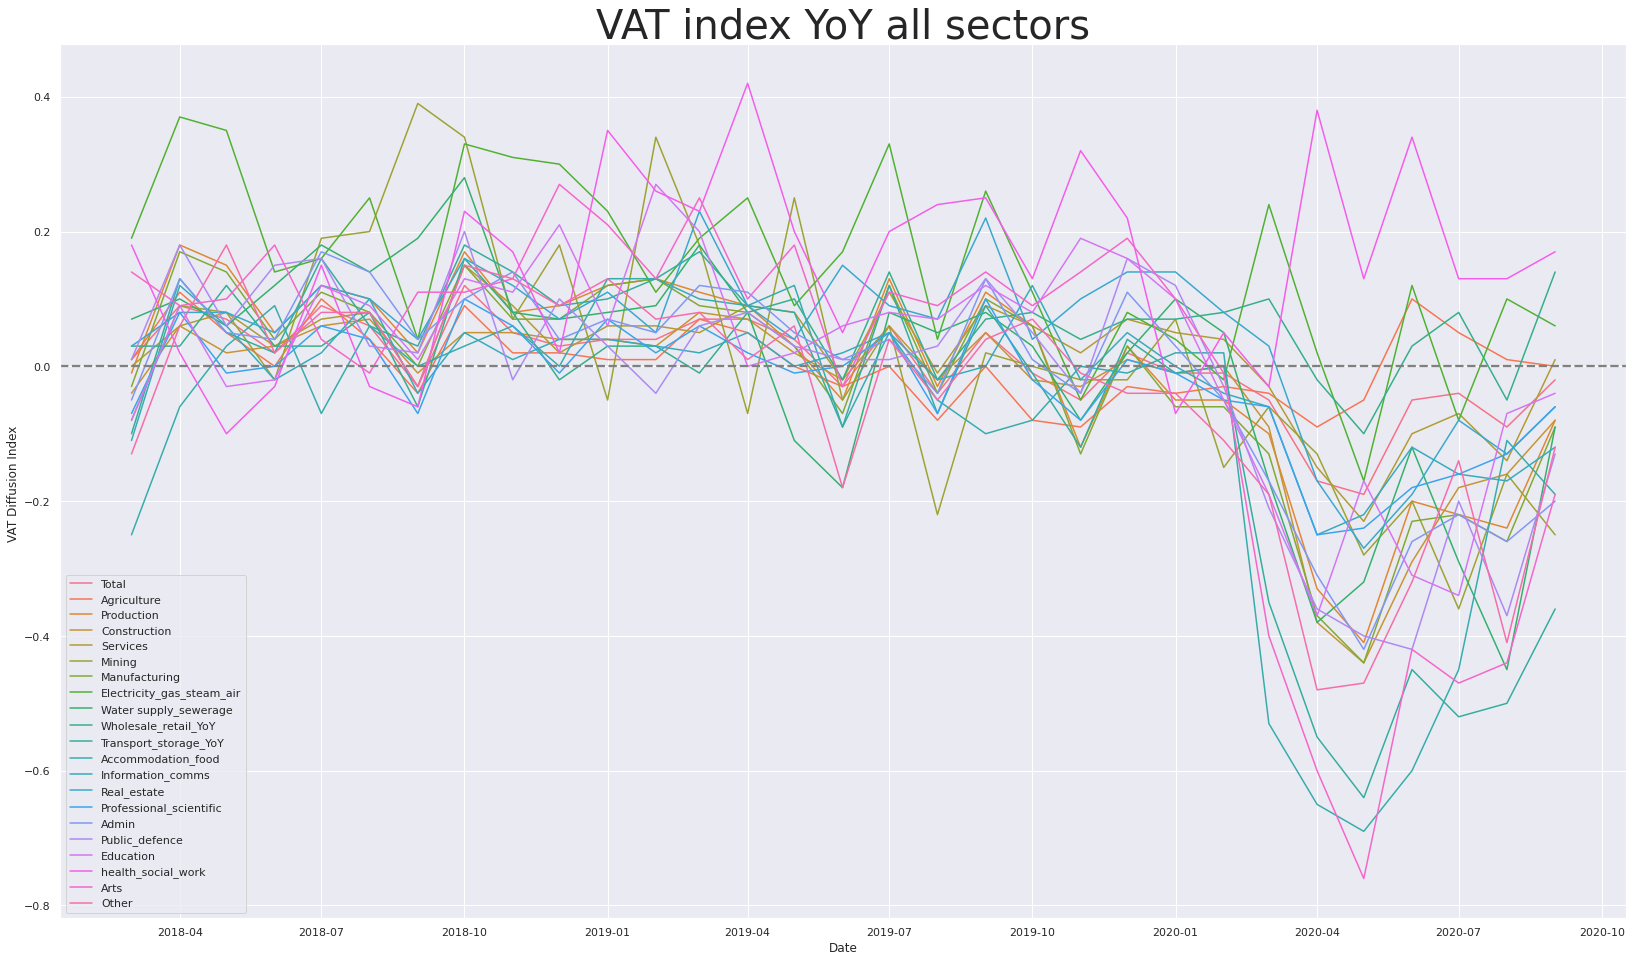

In [177]:
## VISUALISATION 1

#Sector by sector VAT index plot
plt.figure(figsize=(25,15))
VAT_1.head()
VAT_3 = VAT_1

#Set date as index
VAT_3 = VAT_3.set_index('Date')
sns.lineplot(data=VAT_3, dashes=False)
sns.set_style("whitegrid")
sns.set_context("talk")

#Title and axis labelling
plt.title("VAT index YoY all sectors", fontsize = 40)
plt.xlabel("Date")
plt.ylabel("VAT Diffusion Index ")

#Set baseline 
plt.axhline(0, ls='--', color= 'grey')

plt.show();

First, we plot VAT index for all UK economic sectors from March 2018 - September 2020. 

From March 2018 to January 2020 the VAT index is stable with mild seasonal fluctuations. A decrease in VAT turnover in all but one UK sector was registered in March 2020. Health and social care increased and manufacturing remained stable. The Arts, hospitality and accomodation appear to have been hardest hit. The plot  highlights differntiation in the magnitude of sectors hit. 

In [138]:
#VAT_2 date conversion 
VAT_2 = VAT_1[['Date', "Total"]].copy()
VAT_2['Date'] = VAT_2['Date'].astype('datetime64[ns]')
VAT_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    31 non-null     datetime64[ns]
 1   Total   31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 744.0 bytes


Plotting the VAT diffusion index for all sectors showed a clearer portrait of economic events. March 2020 saw a dramatic drop in VAT turnover for the entire UK economy. A short-lived recovery occured up until June as restrictions were lifted. 

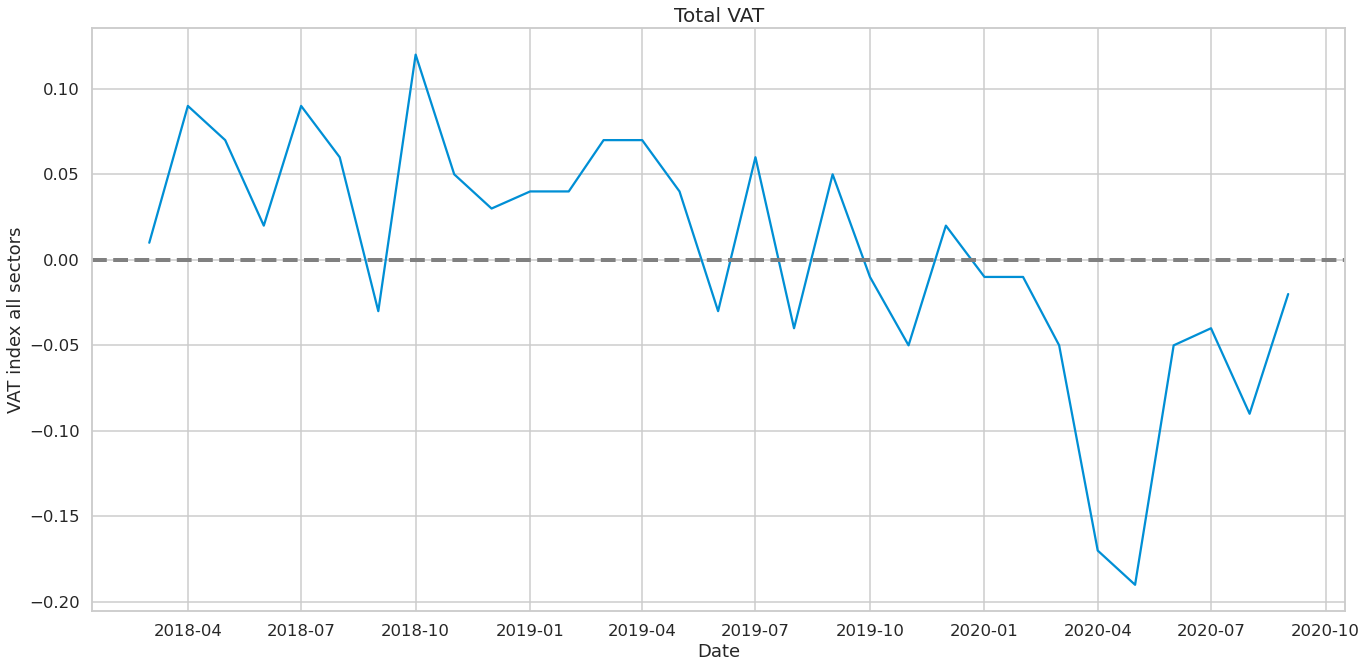

In [178]:
## VISUALISATION 2

#Total Vat plot only
plt.figure(figsize=(20,10))
sns.lineplot(data=VAT_2, x="Date", y="Total", dashes=False)
sns.set_style("darkgrid")
sns.set_context("talk")

#label plot axis and title
plt.title("Total VAT", fontsize=20)
plt.xlabel("Date")
plt.ylabel("VAT index all sectors")
plt.style.use('fivethirtyeight');

#Set baseline
plt.axhline(0, ls='--', color= 'grey')

plt.show();

VAT Data not included in the regression:

The VAT data was not used in the regressional modelling as the monthly intervals of data meant the size of data was inadeguate to yield a reliable result. 

### 5.2 Data Visualisation for Merged datasets

In [140]:
# merge apple and confinement
apple.dtypes
Confinement_index.dtypes
apple_confinement = pd.merge(apple, Confinement_index, on = "Date")

Date       datetime64[ns]
DRIVING           float64
TRANSIT           float64
WALKING           float64
dtype: object

1
Date                 datetime64[ns]
Confinement Index           float64
dtype: object

In [141]:
# merge apple_mobility, confinement and C02 data
co2_apple_confinement = pd.merge(uk_co2_data, apple_confinement, on = "Date", how = 'inner')
co2_apple_confinement.head()

,Date,CO2,DRIVING,TRANSIT,WALKING,Confinement Index
0,2020-01-13,0.0,100.00,100.00,100.00,0.0
1,2020-01-14,0.0,104.86,104.20,106.14,0.0
2,2020-01-15,0.0,106.40,105.37,114.37,0.0
3,2020-01-16,0.0,104.28,103.89,112.59,0.0
4,2020-01-17,0.0,109.27,109.38,128.99,0.0


In [142]:
# apple_mobility, confinement and C02 data
co2_apple_confinement.info()
co2_apple_confinement.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               151 non-null    datetime64[ns]
 1   CO2                151 non-null    float64       
 2   DRIVING            151 non-null    float64       
 3   TRANSIT            151 non-null    float64       
 4   WALKING            151 non-null    float64       
 5   Confinement Index  151 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 8.3 KB


,CO2,DRIVING,TRANSIT,WALKING,Confinement Index
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,-0.202567,74.587682,58.397285,80.703841,1.728477
std,0.141338,31.041209,43.169671,39.405346,1.113156
min,-0.355976,24.460000,13.500000,29.620000,0.000000
25%,-0.355976,42.195000,17.620000,45.505000,1.000000
50%,-0.268018,73.450000,31.410000,64.700000,2.000000
75%,-0.074406,106.405000,105.885000,113.950000,3.000000
max,0.000000,127.350000,126.900000,172.590000,3.000000


In [143]:
# rename motor_movement
motor_movement.dtypes
motor_movement = motor_movement.rename(columns={ "date":"Date"})
motor_movement.head()

date                datetime64[ns]
all_motor                    int64
cars                         int64
light_commercial             int64
heavy_commercial             int64
dtype: object

,Date,all_motor,cars,light_commercial,heavy_commercial
0,2020-03-01,104,111,103,108
1,2020-03-02,103,106,102,103
2,2020-03-03,102,105,101,102
3,2020-03-04,101,104,101,103
4,2020-03-05,100,103,100,102


In [144]:
# merge motor data with co2_apple_confinement
motor_co2_apple_confinement = pd.merge(motor_movement, co2_apple_confinement, on = "Date")
motor_movement.isnull().values.any()
motor_co2_apple_confinement = motor_co2_apple_confinement.rename(columns={ "CO2_MED":"CO2"})
motor_co2_apple_confinement.head(40)

False

,Date,all_motor,cars,light_commercial,heavy_commercial,CO2,DRIVING,TRANSIT,WALKING,Confinement Index
0,2020-03-01,104,111,103,108,-0.074406,100.48,103.74,105.44,1.0
1,2020-03-02,103,106,102,103,-0.074406,104.64,103.96,107.54,1.0
2,2020-03-03,102,105,101,102,-0.074406,108.34,105.51,114.84,1.0
3,2020-03-04,101,104,101,103,-0.074406,109.59,106.10,116.67,1.0
4,2020-03-05,100,103,100,102,-0.074406,109.18,105.14,110.07,1.0
5,2020-03-06,102,103,102,102,-0.074406,118.61,114.68,144.51,1.0
6,2020-03-07,102,109,101,108,-0.074406,115.05,118.05,172.59,1.0
7,2020-03-08,106,113,105,112,-0.074406,97.90,97.76,101.39,1.0
8,2020-03-09,103,107,101,104,-0.074406,101.47,99.00,100.87,1.0
9,2020-03-10,101,105,99,103,-0.074406,102.73,99.54,108.28,1.0


After analysing the combined dataset of above by an inner join, we found that we lose some level of information each time. Therefore, we decided to keep the UK motor_data seperate from the apple_mobility_data because the motor data starts from March 1st. However, we still need to combine CO2 and motor_data again.

In [145]:
#Merging motor and co2 seperately below
motor_co2 = pd.merge(motor_movement, uk_co2_data, on = "Date", how = "inner")

motor_co2.head()
motor_co2.info()
motor_co2.describe()

,Date,all_motor,cars,light_commercial,heavy_commercial,CO2
0,2020-03-01,104,111,103,108,-0.074406
1,2020-03-02,103,106,102,103,-0.074406
2,2020-03-03,102,105,101,102,-0.074406
3,2020-03-04,101,104,101,103,-0.074406
4,2020-03-05,100,103,100,102,-0.074406


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              103 non-null    datetime64[ns]
 1   all_motor         103 non-null    int64         
 2   cars              103 non-null    int64         
 3   light_commercial  103 non-null    int64         
 4   heavy_commercial  103 non-null    int64         
 5   CO2               103 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 5.6 KB


,all_motor,cars,light_commercial,heavy_commercial,CO2
count,103.000000,103.000000,103.000000,103.000000,103.000000
mean,57.436893,63.388350,54.388350,78.563107,-0.282520
std,23.386216,23.901855,23.839839,17.936527,0.092191
min,23.000000,22.000000,22.000000,25.000000,-0.355976
25%,38.000000,43.000000,35.000000,66.000000,-0.355976
50%,53.000000,60.000000,50.000000,77.000000,-0.305714
75%,69.000000,77.500000,64.500000,91.000000,-0.268018
max,106.000000,113.000000,105.000000,112.000000,-0.074406


## 6. Regressions using time series data

### 6.1 co2_apple_confinement Regressions

In this regression, the dependent variable is CO2 as a daily percentage change. The independent variables are in the form of an index. We can interpret it as 1-unit change in X is equivalent to a 1% change from the day before.

In [146]:
#set dependent variable
X = co2_apple_confinement['CO2'].to_numpy().reshape(-1, 1)
#set independent variable
y = co2_apple_confinement[["Confinement Index"]]

reg = LinearRegression()

#model
reg.fit(X,y)
model1 = DataFrame(reg.coef_)
model1.columns = ["Confinement Index"]
model1.index = ["Coefficient"]

print("Model1: C02 = β1Confinement_index")
model1

# R-squared
R_squared =  reg.score(X, y)
print(f"R-squared: {R_squared}")

LinearRegression()

Model1: C02 = β1Confinement_index


,Confinement Index
Coefficient,-7.715542


R-squared: 0.9597049963217217


In Model1, β1 = -7.72. This suggests that as lockdowns levels increased by each tier, there was a 7.72% reduction in daily CO2 emissions.

In [147]:
co2_apple_confinement.dtypes

Date                 datetime64[ns]
CO2                         float64
DRIVING                     float64
TRANSIT                     float64
WALKING                     float64
Confinement Index           float64
dtype: object

In [148]:
#set dependent variables
X = co2_apple_confinement['CO2'].to_numpy().reshape(-1, 1)
#set indepedent variables
y = co2_apple_confinement[["WALKING", "TRANSIT", "DRIVING"]]

# run regression
reg.fit(X,y)
model2 = reg.coef_
model2 = reg.coef_.reshape(1,3)
model2 = DataFrame(model2)
model2.columns = ["WALKING", "TRANSIT", "DRIVING"]
model2.index = ["Coefficients"]
print("Model2: C02 = β1Walking + β2Transit + β3Driving")
model2

# R-squared
R_squared =  reg.score(X, y)
print(f"R-squared: {R_squared}")

LinearRegression()

Model2: C02 = β1Walking + β2Transit + β3Driving


,WALKING,TRANSIT,DRIVING
Coefficients,253.652008,296.504277,207.075612


R-squared: 0.8863608386890188


Model 2 shows that all 3 variables contribute to UK CO2 levels. The largest was TRANSIT. 1% increase in the use of public transport increases UK CO2 by 297% which is very high. However, intuitively, as the data visualisations show, TRANSIT decreased most during the first lockdown (about 80%) as economic and social activities were at record lows. Consequently, CO2 emissions were relatively low.  This explains why TRANSIT has the largest coeffcient. As public transport began again,  all other activities resumed, causing a return to normal pollution levels.

Also, DRIVING and WALKING were less affected by lockdown, so these coefficients are smaller, but can be interpreted in a similar way meaning that the results merely suggest a correlation between the variables. Other regression results may be better at providing a causal inference.

### 6.2 UK Motor Data Regression

In this regression, the dependent variable remains CO2 levels (daily % change). The independent variables considered are variations in traffic levels in cars, light commercial vehicles and heavy commercial vehicles from baseline 100.

In [149]:
#set depedent variable
X = motor_co2['CO2'].to_numpy().reshape(-1, 1)
#set indepedent variables
y = motor_co2[["light_commercial", "heavy_commercial", "cars"]]

# run regression
reg.fit(X,y)
print("Model: C02 = β1LC + β2HC + β3Car")
model3 = DataFrame(reg.coef_.reshape(1,3))
model3.columns = ["Light Commercial", "Heavy Commercial", "Cars"]
model3.index = ["Coefficients"]
model3
# R-squared
R_squared =  reg.score(X, y)
print(f"R-squared: {R_squared}")

LinearRegression()

Model: C02 = β1LC + β2HC + β3Car


,Light Commercial,Heavy Commercial,Cars
Coefficients,247.538756,154.068591,239.777916


R-squared: 0.7995934690972307


Model 3 shows that all 3 variables contribute to UK CO2 levels, the largest being light commercial vehicles. 1% increase in light commercial vehicle circulation results in 247% increase in UK CO2 levels. This is closely followed by car movement, with 1% increase resulting in 238% increase in CO2. While a high value, the spike in UK CO2 levels can be justified. In fact, light commercial vehicles and car traffic levels were those shown to decrease the most, outlining low economic activity during the full-scale lockdown. 

## 7. Summary and Limitations

### Insights

Model 1 suggests the transition between each tier of restrictions by the UK government reduced CO2 emissions by about 7%. The model suggests that whilst lockdown in the UK did have an effect on reducing CO2 emissions in the UK, this was only by a relatively small amount and for a short period of time (<12 months).

Restricting movement of the UK population has had adverse effects, inclduing harming public finances, shown by the YoY visulation of UK public finances. This suggests this is not a suitable method to control CO2 emissions. This provides further support for transitioning to green energy and incentivising firms to have net zero carbon emissions, rather than harming the economy.

Model 2 was unable to provide causal inference into the relationship between daily CO2 changes in the UK and Apple Mobility Data. The Apple Mobility Data visualisation provides a greater insight into the change of behvaiour by people during the COVID19-pandemic.

Model 3 as traffic approached pre-covid levels, economic activity picked up resulting in CO2 levels increasing rapidly. Further, this explains why  heavy motor vehicles  has the lowest coefficient,  as a milder drop in traffic levels was registered for the vehicle type. Therefore, this shows a significant reduction in the level of CO2 emission across all motor vehicle types during lockdown.

In conclusion, these are the insights we would like to provide to DEFRA.

### Limitations

Limited by time, it would have been beneficial to explore more statistical techniques, such as intrumental variable (2SLS) regression analysis to determine the causal relationship between daily CO2 changes and the variables explored in this paper. Our results must be taken with a pinch of salt, as there are likely many omitted variables in each of our models, leading to signficant bias in the resulting estimated coefficients.

It would have been interesting to predict changes in CO2 emissions in the UK and globally. This could be used to predict overall changes to Earth's average temperatures, quanitify the extremity of global warming and the exact reduction in CO2 levels to prevent global CO2 levels (and temperatures) surpassing a certain threshold.

## References

Apple (2020). "Mobility Trends Reports" Apple. https://covid19.apple.com/mobility

Google (2020). "Community Mobility Reports Help". Retrieved from https://support.google.com/covid19-mobility/answer/9824897?hl=en&ref_topic=9822927

ICOS. (2019). Global Carbon Budget 2019. Retrieved from https://www.icos-cp.eu/science-and-impact/global-carbon-budget/2019

Le Quéré, C., R.B. Jackson, M.W. Jones, A.J.P. Smith, S. Abernethy, R.M. Andrew, A.J. De-Gol, D.R. Willis, Y. Shan, J.G. Canadell, P. Friedlingstein, F. Creuzig, and G.P. Peters (2020). "Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement." Nature Climate Cange. https://doi.org/10.1038/s41558-020-0797-x. 

Office for National Statistics. (2020). Coronavirus and the latest indicators for the UK economy and society - Office for National Statistics. Retrieved from www.ons.gov.uk website: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/bulletins/coronavirustheukeconomyandsocietyfasterindicators/26november2020

Office for National Statistics. (2020). Economic activity, faster indicators, UK - Office for National Statistics. Retrieved from www.ons.gov.uk website: https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/economicactivityfasterindicatorsuk

## Appendix 1

Confinement Index levels:	
Level	Description	Policy examples

    0	No restrictions	
    1	Policies targeted at:	
                            - Isolation of sick or symptomatic individuals
	                          or long distance travel - Self-quarantine of travellers arriving from affected countries
	                       	- Screening passengers at transport hubs
	                        - Ban of mass gatherings >5000
	                        - Citizen repatriation                        
    2	Regional policies that:	
                            - Closure of all national borders
                            - Mandatory closure of schools, universities, public buildings.
                            - Ban public gathering >100 and social distancing >2m
    3	National policies that:	
                            - Mandatory national ‘lockdown’ requiring household confinement of all
                            - Ban public gathering >2 and social distancing >2m

#### Division of Tasks:

Although, all of us contributed equally to this project we divided the tasks wherever necessary. One of us acted as a project management, one of us put in additional effort into data cleaning, one worked more towards regressions, one into editing the final document. 